In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [6]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6684 - loss: 1.1969 - val_accuracy: 0.9054 - val_loss: 0.3364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9048 - loss: 0.3331 - val_accuracy: 0.9247 - val_loss: 0.2658
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9218 - loss: 0.2722 - val_accuracy: 0.9336 - val_loss: 0.2320
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9319 - loss: 0.2341 - val_accuracy: 0.9424 - val_loss: 0.2063
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9406 - loss: 0.2040 - val_accuracy: 0.9474 - val_loss: 0.1839
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9493 - loss: 0.1791 - val_accuracy: 0.9521 - val_loss: 0.1716
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9524 - loss: 0.1658 - val_accuracy: 0.9539 - val_loss: 0.1612
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9584 - loss: 0.1465 -

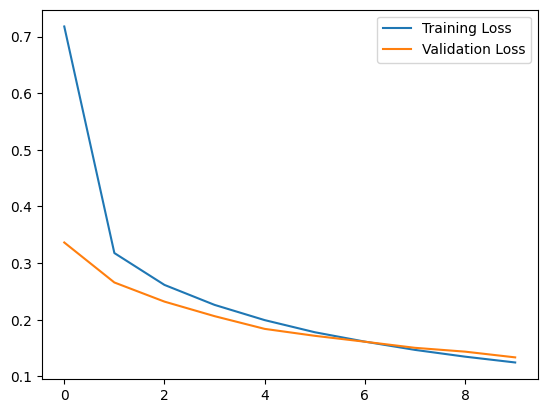

In [9]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


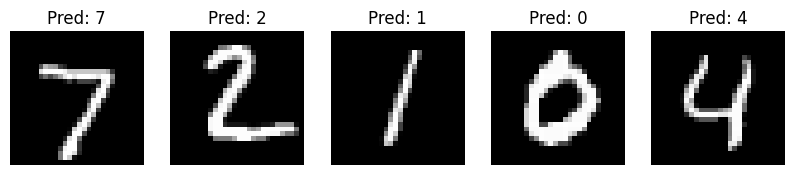

In [10]:

sample_images = X_test[:5].reshape(-1, 28, 28)
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

In [11]:

print("""
Analysis:
- ReLU activation avoids vanishing gradients in hidden layers, speeding up training.
- SGD optimizer (gradient descent) converges slower than Adam but is simpler.
- Softmax ensures output probabilities sum to 1 for multi-class classification.
""")


Analysis:
- ReLU activation avoids vanishing gradients in hidden layers, speeding up training.
- SGD optimizer (gradient descent) converges slower than Adam but is simpler.
- Softmax ensures output probabilities sum to 1 for multi-class classification.

